This section is a walk through the pre-alignment sequence filtering in ReproPhylo. We will start by several preliminaries discussed above:

In [7]:
from reprophylo import *

pj = Project('data/edited_loci.csv',
            pickle='outputs/prealignment_filtering.pkpj',
            git=False)
pj.read_embl_genbank(['data/Tetillidae.gb'])

## 3.5.1 Filtering by sequence length or GC content
At this point we have record features belonging to the loci in our `Project`. We have to split them by locus:

In [8]:
pj.extract_by_locus()

With this done, we can display length and %GC distribution for each locus:  

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


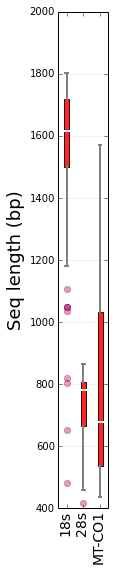

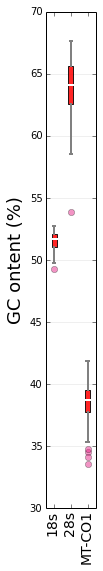

In [9]:
%matplotlib inline
pj.report_seq_stats()

Now we'll exclude all the outliers:

In [10]:
# Define minima and maxima
gc_inliers = {
    '18s': [50,54],
    '28s': [57,67],
    'MT-CO1': [35,43]
}
len_inliers = {
    '18s': [1200,1800],
    '28s': [500,900],
    'MT-CO1': [500,1500]
}

# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])
    
    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

We can now confirm that the filter worked:

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


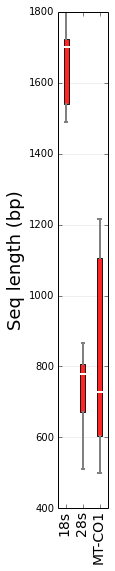

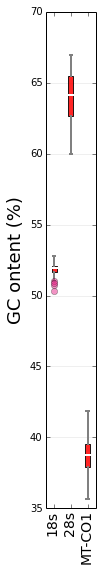

In [12]:
pj.report_seq_stats()

## 3.5.2 Excluding and including
It is possible to exclude and include sequences by record id
### 3.5.2.1 Excluding
By default, excluding is done by starting with a full bin (all the sequences are included). In this case, since we have already filtered some sequences out, we need to start excluding from the current state and not from a full bin. As an example we will exclude `JX177918.1` from the `MT-CO1` `Locus` bin.

In [21]:
exclude = {'MT-CO1': ['JX177918.1']}
pj.exclude(start_from_max=False, **exclude)

The following line confirms that this record id is no longer in the `MT-CO1` `Locus` bin.

In [22]:
any(['JX177918.1' in feature.id for feature in pj.records_by_locus['MT-CO1']])

False

### 3.5.2.2 Including
By default, including starts from empty bins, however here we want to keep the current state and only add one sequence:

In [23]:
include = {'MT-CO1': ['JX177918.1']}
pj.include(start_from_null=False, **include)

The following line confirms that this record was added back to the `MT-CO1` `Locus` bin.

In [24]:
any(['JX177918.1' in feature.id for feature in pj.records_by_locus['MT-CO1']])

True

## 3.5.3 Quick reference

In [ ]:
# Split records to loci bins
pj.extract_by_locus()

# Show length and %GC distributions
%matplotlib inline
pj.report_seq_stats()

# Filter  by GC content
pj.filter_by_locus('LocusName',
                    min_percent_gc = 30,
                    max_percent_gc = 50)

# Filter  by sequence length
pj.filter_by_seq_length('LocusName',
                        min_length = 200,
                        max_length = 1000)

# Include or exclude records in the loci bins
records = {'LocusName1': ['recordid1','recordid2'],
            'LocusName2': ['recordid3','recordid4']}
pj.exclude(start_from_max=True, **records)

# or
pj.include(start_from_null=True, **records)